In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading data

In [3]:
student_data = pd.read_csv("../datasets/student-alcohol-consumption.csv")
student_data

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20,LE3,A,2,2,1,2,...,4,4,5,4,11,9,9,9,Urban,2 to 5 hours
391,391,MS,M,17,LE3,T,3,1,2,0,...,5,3,4,2,3,14,16,16,Urban,<2 hours
392,392,MS,M,21,GT3,T,1,1,1,3,...,3,3,3,3,3,10,8,7,Rural,<2 hours
393,393,MS,M,18,LE3,T,3,2,3,0,...,1,3,4,5,0,11,12,10,Rural,<2 hours


# Example 1 - scatterplot

<Axes: xlabel='absences', ylabel='G3'>

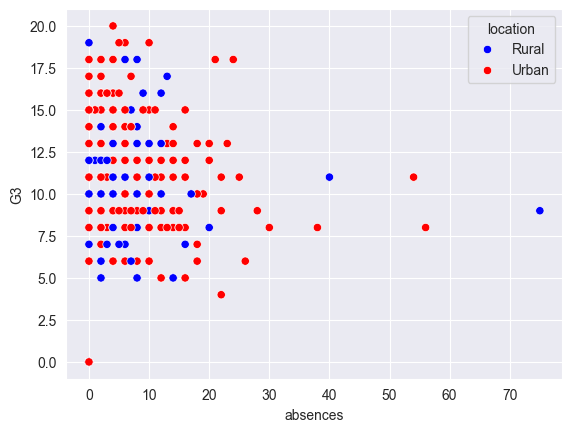

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(data=student_data, 
                x="absences",
                y="G3",
                hue="location",
                hue_order=["Rural", "Urban"],
                palette={
                    "Rural": "Blue",
                    "Urban": "Red"
                },
                ax=ax)

# Example 2 - relplot

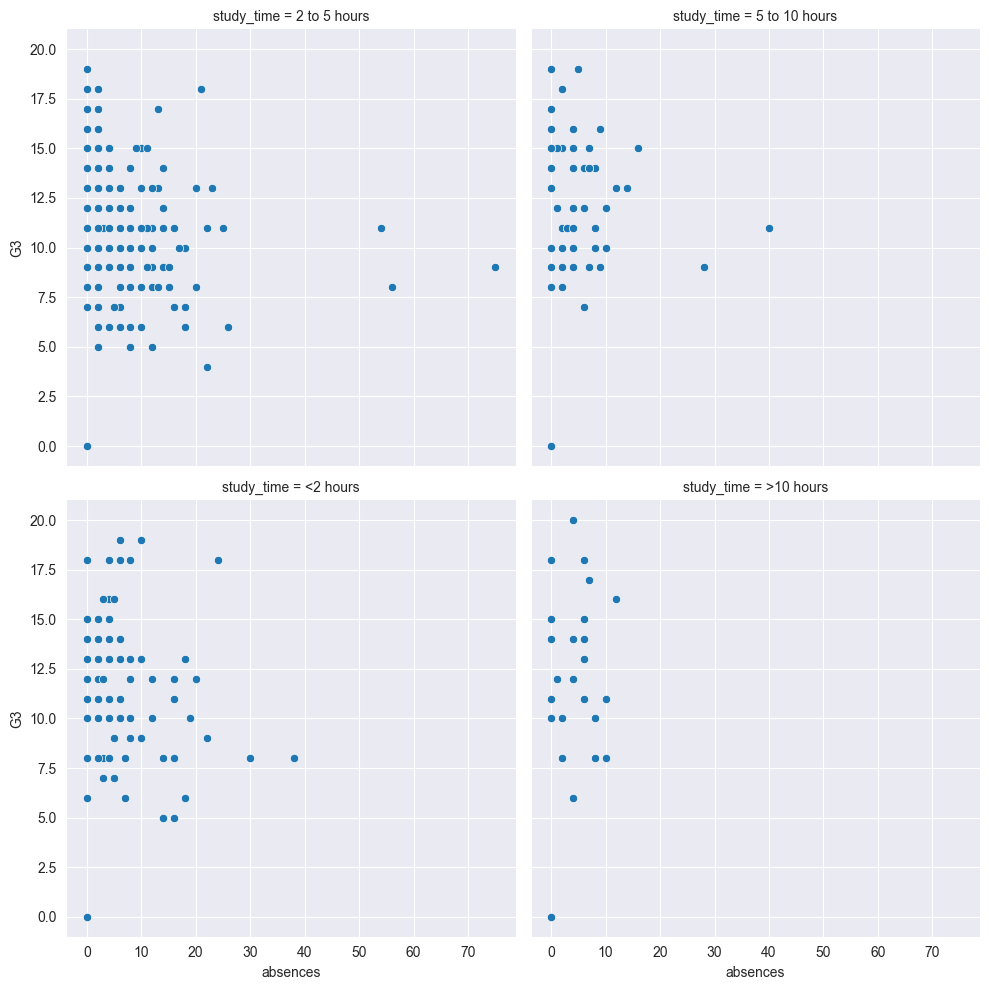

In [16]:
sns.relplot(x="absences",
            y="G3",
            data=student_data,
            kind="scatter",
            col="study_time",
            col_wrap=2
            )
plt.show()

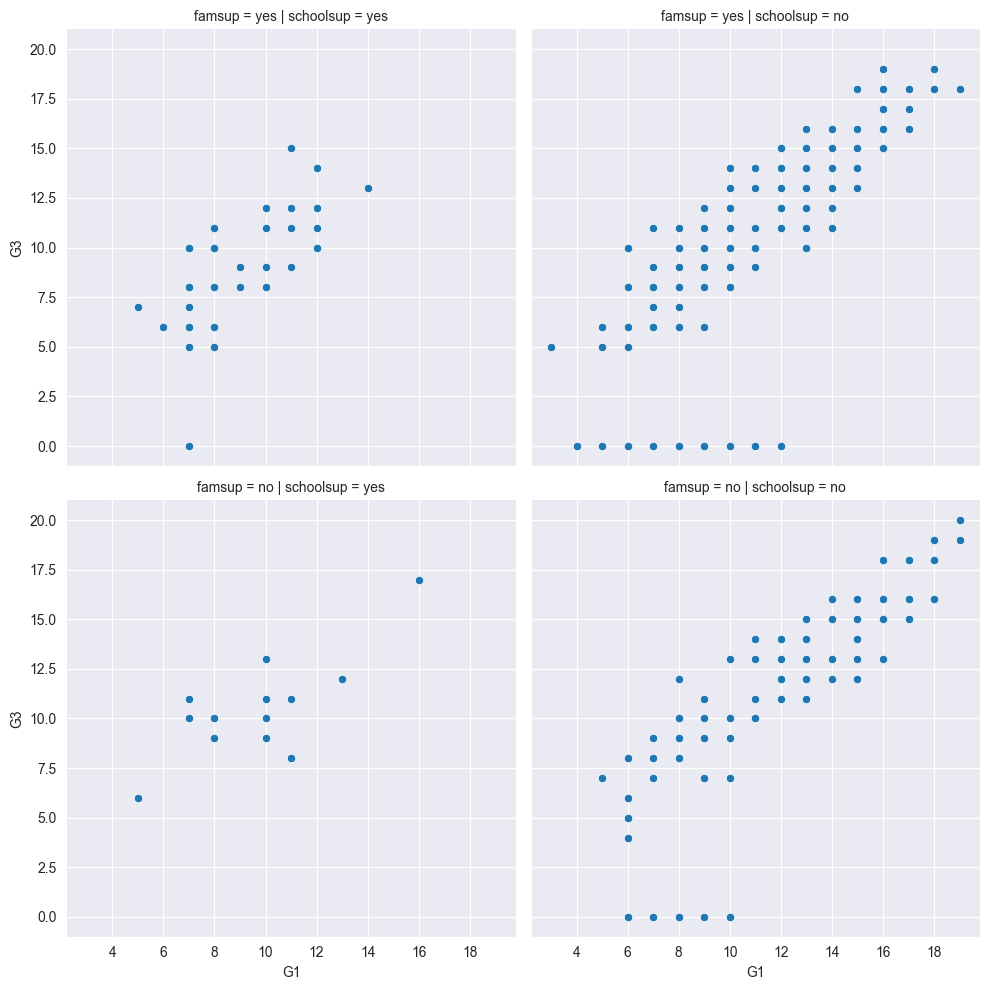

In [17]:
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            row="famsup",
            col_order=["yes", "no"],
            row_order=["yes","no"])
plt.show()